In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_pickle('df_GHI.plk')
df.head()

,Timestamp,GHI,DoY Sin,DoY Cos
0,2022-02-21 18:00:00,0.002335,0.778764,0.627317
1,2022-02-21 18:10:00,0.000274,0.778764,0.627317
2,2022-02-21 18:20:00,0.000000,0.778764,0.627317
3,2022-02-21 18:30:00,0.000000,0.778764,0.627317
66,2022-02-22 05:00:00,0.000245,0.789418,0.613856


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61012 entries, 0 to 107139
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  61012 non-null  datetime64[ns]
 1   GHI        61012 non-null  float64       
 2   DoY Sin    61012 non-null  float64       
 3   DoY Cos    61012 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.3 MB


In [4]:
columns = ['Timestamp','GHI']
df = df[columns]
df = df.reset_index(drop=True)
df.rename(columns={'Timestamp': 'ds', 'GHI': 'y'}, inplace=True)
df.head()

,ds,y
0,2022-02-21 18:00:00,0.002335
1,2022-02-21 18:10:00,0.000274
2,2022-02-21 18:20:00,0.000000
3,2022-02-21 18:30:00,0.000000
4,2022-02-22 05:00:00,0.000245


In [5]:
m = Prophet()
m.fit(df)

15:00:37 - cmdstanpy - INFO - Chain [1] start processing
15:00:58 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
61372,2025-03-02 18:30:00
61373,2025-03-03 18:30:00
61374,2025-03-04 18:30:00
61375,2025-03-05 18:30:00
61376,2025-03-06 18:30:00


In [8]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
61372,2025-03-02 18:30:00,0.240855,-0.828478,1.214562
61373,2025-03-03 18:30:00,0.255629,-0.791548,1.207645
61374,2025-03-04 18:30:00,0.263385,-0.759529,1.214508
61375,2025-03-05 18:30:00,0.273881,-0.759576,1.274757
61376,2025-03-06 18:30:00,0.256840,-0.785660,1.199573


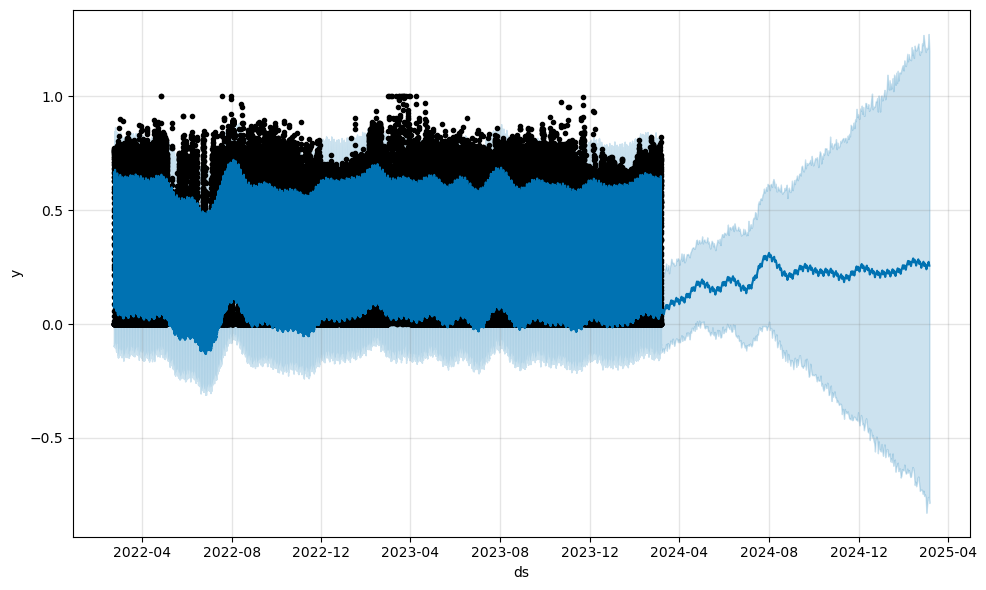

In [9]:
fig1 = m.plot(forecast)

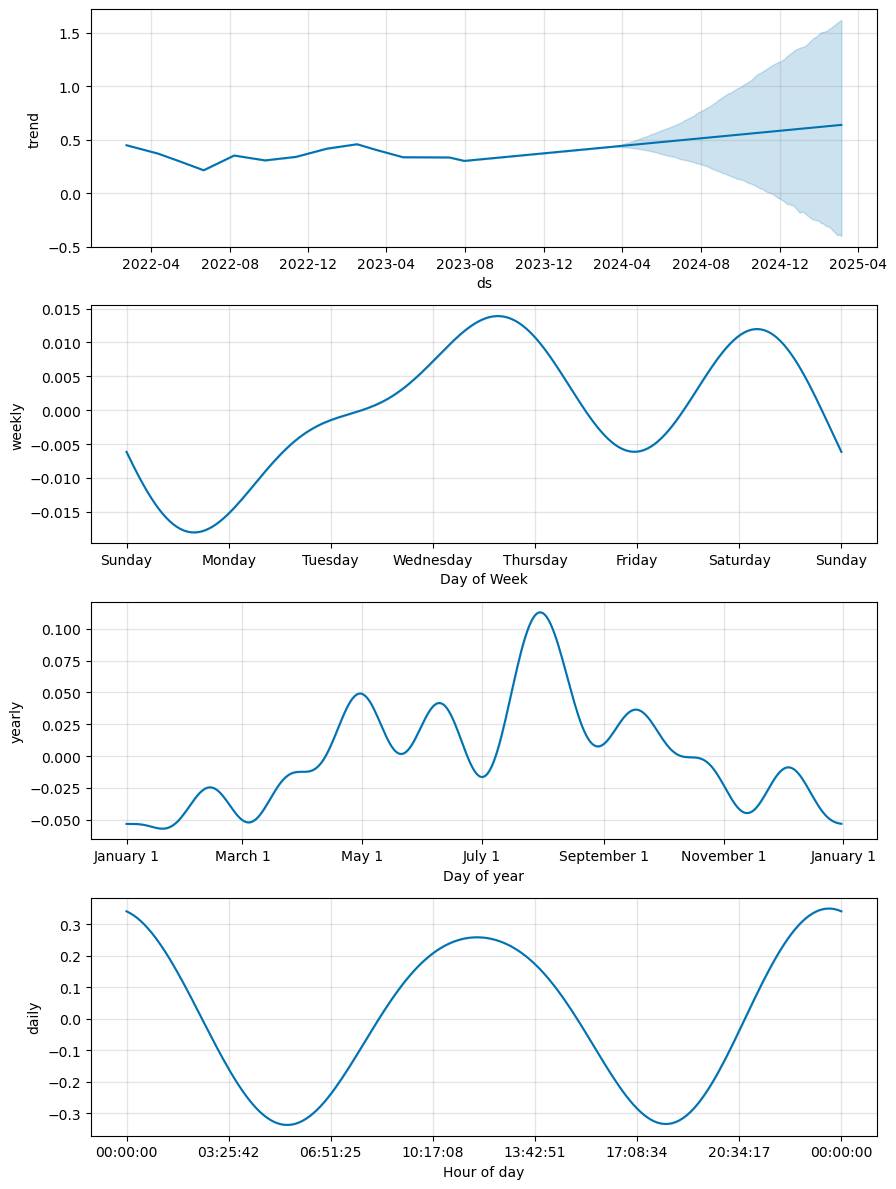

In [10]:
fig2 = m.plot_components(forecast)